#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest, chi2


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score





%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Original Data Set

In [2]:
df = pd.read_csv('medical_clean.csv', index_col = 0)
df.isna().sum()

Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
Item1           

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

original Data

In [4]:
df.describe()

,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


# working DataFrame

In [5]:
# Creating a new data frame for adjustments
cln_df = df.copy()

Dropring variables with more than 5 levels

In [6]:
# Viewing levels of categorical variables
obj_var = cln_df.select_dtypes(include=['object'])

# Get unique values for each object column
obj_levels = obj_var.nunique()

# Drop columns with more than 5 unique values
drops = obj_levels[obj_levels > 5].index

# Filter the original DataFrame
cln_df.drop(columns=drops, inplace=True)

In [7]:
cln_df.drop(['Zip','Lat','Lng','Population','Children','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'],axis=1,inplace=True)

In [8]:
cln_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   ReAdmis             10000 non-null  object 
 6   VitD_levels         10000 non-null  float64
 7   Doc_visits          10000 non-null  int64  
 8   Full_meals_eaten    10000 non-null  int64  
 9   vitD_supp           10000 non-null  int64  
 10  Soft_drink          10000 non-null  object 
 11  Initial_admin       10000 non-null  object 
 12  HighBlood           10000 non-null  object 
 13  Stroke              10000 non-null  object 
 14  Complication_risk   10000 non-null  object 
 15  Overweight          10000 non-null  object 
 16  Arth

## Encode

In [9]:
categorical_cols = cln_df.select_dtypes(['object']).columns

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_columns = encoder.get_feature_names_out(categorical_cols)


encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns, index=cln_df.index).astype('category')
df_without_categorical = cln_df.drop(columns=categorical_cols).astype('float') # Droping categorical features from working data frame
cln_df_enc = pd.concat([df_without_categorical, encoded_df], axis=1)
cln_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  10000 non-null  float64 
 1   Income                               10000 non-null  float64 
 2   VitD_levels                          10000 non-null  float64 
 3   Doc_visits                           10000 non-null  float64 
 4   Full_meals_eaten                     10000 non-null  float64 
 5   vitD_supp                            10000 non-null  float64 
 6   Initial_days                         10000 non-null  float64 
 7   TotalCharge                          10000 non-null  float64 
 8   Additional_charges                   10000 non-null  float64 
 9   Area_Suburban                        10000 non-null  category
 10  Area_Urban                           10000 non-null  category
 11  Marital_Married

# Chi2

In [10]:
# Separate features (X) and target variable (y)
X = cln_df_enc.drop(['ReAdmis_Yes'], axis=1)
y = cln_df_enc['ReAdmis_Yes']


# Apply the chi-squared test
k = X.shape[1]  # You can adjust the number of features you want to select
selector = SelectKBest(chi2, k=k)
selector.fit(X, y)

# Get scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a DataFrame with scores and p-values for each feature
results = pd.DataFrame({'Feature': X.columns,'Score': scores,'p-Value': p_values
})

# Sort the results by score in descending order
results.sort_values(by='Score', ascending=False, inplace=True)

# Display the results
print(results)

                                Feature         Score   p-Value
7                           TotalCharge  6.370258e+06  0.000000
6                          Initial_days  1.454248e+05  0.000000
1                                Income  2.658423e+04  0.000000
8                    Additional_charges  6.138332e+03  0.000000
0                                   Age  1.989540e+01  0.000008
33                     Services_CT Scan  5.221993e+00  0.022303
34                 Services_Intravenous  2.834588e+00  0.092254
32                           Asthma_Yes  2.086136e+00  0.148642
18    Initial_admin_Emergency Admission  1.918495e+00  0.166023
4                      Full_meals_eaten  1.503437e+00  0.220143
5                             vitD_supp  1.206541e+00  0.272018
19  Initial_admin_Observation Admission  1.084173e+00  0.297766
28                         BackPain_Yes  1.043178e+00  0.307084
35                         Services_MRI  8.336206e-01  0.361228
14                      Marital_Widowed 

In [11]:
# Convert data dictionary to a pandas DataFrame
df = pd.DataFrame()

# Define thresholds
score_threshold = 0.5  # Threshold for the score
pvalue_threshold = 0.05  # Threshold for the p-value

# Identify features to exclude based on the thresholds
features_to_exclude = results[(results['Score'] < score_threshold) & (results['p-Value'] > pvalue_threshold)]

# List the features to exclude
features_to_exclude_list = features_to_exclude['Feature'].tolist()

# Print the list of features to exclude
print("Features to exclude:", features_to_exclude_list)

Features to exclude: ['Soft_drink_Yes', 'Gender_Nonbinary', 'Arthritis_Yes', 'Marital_Never Married', 'Marital_Married', 'Area_Urban', 'Overweight_Yes', 'Reflux_esophagitis_Yes', 'Allergic_rhinitis_Yes', 'Hyperlipidemia_Yes', 'Diabetes_Yes', 'Complication_risk_Medium', 'Anxiety_Yes', 'VitD_levels', 'HighBlood_Yes', 'Complication_risk_Low', 'Stroke_Yes', 'Marital_Separated', 'Area_Suburban', 'Doc_visits']


In [12]:
cln_df_enc.drop(features_to_exclude_list, axis=1, inplace=True)

In [13]:
cln_df_enc.head()

,Age,Income,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Marital_Widowed,Gender_Male,ReAdmis_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,BackPain_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
CaseOrder,,,,,,,,,,,,,,,,,
1,53.0,86575.93,0.0,0.0,10.585770,3726.702860,17939.403420,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,51.0,46805.99,2.0,1.0,15.129562,4193.190458,17612.998120,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,53.0,14370.14,1.0,0.0,4.772177,2434.234222,17505.192460,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,39741.49,1.0,0.0,1.714879,2127.830423,12993.437350,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,22.0,1209.56,0.0,2.0,1.254807,2113.073274,3716.525786,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Scaling

In [14]:
cln_df_enc.columns

Index(['Age', 'Income', 'Full_meals_eaten', 'vitD_supp', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Marital_Widowed', 'Gender_Male',
       'ReAdmis_Yes', 'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'BackPain_Yes', 'Asthma_Yes',
       'Services_CT Scan', 'Services_Intravenous', 'Services_MRI'],
      dtype='object')

In [15]:
sc=StandardScaler()

columns_to_drop = ['Marital_Widowed', 'Gender_Male', 'ReAdmis_Yes', 'Initial_admin_Emergency Admission',
                   'Initial_admin_Observation Admission', 'BackPain_Yes', 'Asthma_Yes', 'Services_CT Scan',
                   'Services_Intravenous', 'Services_MRI']

scaling_df = cln_df_enc.drop(columns_to_drop, axis=1)

feature_columns = scaling_df.columns

scaled_features = sc.fit_transform(scaling_df)
scaled_df = pd.DataFrame(scaled_features, columns=feature_columns, index=cln_df_enc.index)


fin_scaled_df = pd.concat([scaled_df, cln_df_enc[columns_to_drop]], axis=1)
fin_scaled_df.head()


,Age,Income,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Marital_Widowed,Gender_Male,ReAdmis_Yes,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,BackPain_Yes,Asthma_Yes,Services_CT Scan,Services_Intravenous,Services_MRI
CaseOrder,,,,,,,,,,,,,,,,,
1,-0.024795,1.615914,-0.993387,-0.634713,-0.907310,-0.727185,0.765005,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.121706,0.221443,0.990609,0.956445,-0.734595,-0.513228,0.715114,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.024795,-0.915870,-0.001389,-0.634713,-1.128292,-1.319983,0.698635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.186592,-0.026263,-0.001389,-0.634713,-1.244503,-1.460517,0.009004,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,-1.526914,-1.377325,-0.993387,2.547602,-1.261991,-1.467285,-1.408991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Scaling to .csv

In [16]:
fin_scaled_df.to_csv('D209_MartinezReices_ScaledData.csv', index=False)

### Split

In [17]:
X = fin_scaled_df.drop(['ReAdmis_Yes'], axis=1)
y = fin_scaled_df['ReAdmis_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [18]:
print(type(y_train))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [19]:
train_data = pd.concat([X_train,y_train], axis =1)
test_data = pd.concat([X_test,y_test], axis =1)

train_data.to_csv('D209_MartinezReices_train_data.csv', index=False)
test_data.to_csv('D209_MartinezReices_test_data.csv', index=False)

In [20]:
params = {'n_neighbors':np.arange(10, 50, 100), 'metric': ['euclidean', 'manhattan', 'minkowski'],
         'weights': ['uniform', 'distance'],'p': [1, 2]}

          
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, params, cv = 10)
knn_cv.fit(X_train, y_train)
          
best_parameters = knn_cv.best_params_
best_score = knn_cv.best_score_

print('best_parameters :', best_parameters)
print('best_score:', best_score)

best_parameters : {'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
best_score: 0.94725


In [21]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 10, p= 1, weights= 'uniform')
knn.fit(X_train, y_train)

knn_score = knn.score(X_test, y_test)

# Print the score
print(knn_score)

0.9485


In [22]:
y_pred = knn.predict(X_test)
y_pred

array([0., 1., 0., ..., 1., 1., 1.])

In [ ]:
# Confusion Matrix

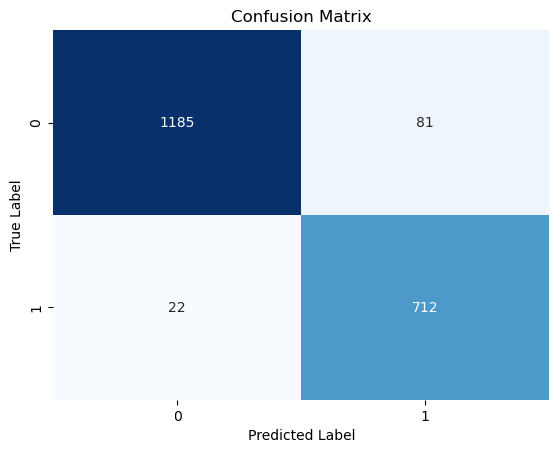

In [23]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Metrics Report

In [24]:
target_names = ['Class 0 = No Readmission', 'Class 1 = Readmission']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

                          precision    recall  f1-score   support

Class 0 = No Readmission       0.98      0.94      0.96      1266
   Class 1 = Readmission       0.90      0.97      0.93       734

                accuracy                           0.95      2000
               macro avg       0.94      0.95      0.95      2000
            weighted avg       0.95      0.95      0.95      2000



In [ ]:
## ROC Curve

In [25]:
y_prob = knn.predict_proba(X_test)[:,1]

falseposrate,trueposrate, threshold = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

print(roc_auc)


0.9908032766420876


Text(0.5, 1.0, 'ROC : Receiver Operating Characteristic')

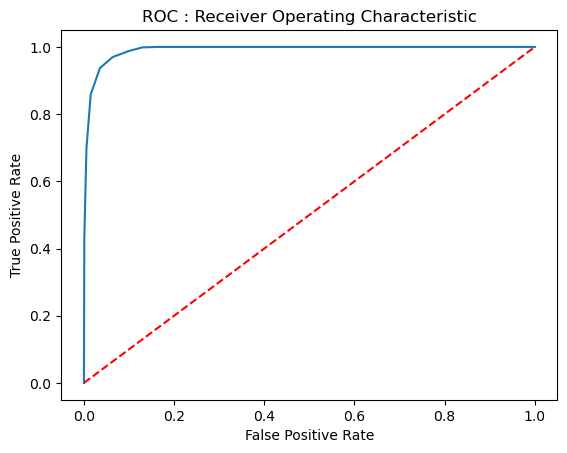

In [26]:
plt.figure()
plt.plot(falseposrate,trueposrate)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristic')